In [1]:
#importing necessary packages

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
from pathlib import Path
import os, pickle

In [2]:
#Loading pickle files

file_path_X = open(os.path.join(r".\X_new.pickle"), 'rb')

file_path_Y = open(os.path.join(r".\Y_new.pickle"), 'rb')
X = pickle.load(file_path_X)
y = pickle.load(file_path_Y)

In [3]:
number_of_classes = max(y) + 1 #Number of classes

In [4]:
number_of_classes

44

In [5]:
X = X/255.0 #Normalising the images

In [6]:
print(X.shape)


(374, 50, 50, 1)


In [7]:
# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten()) #Transforms all information from previous convolutions into inputs for neurons
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer for given number of classes
model.add(Dense(number_of_classes))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [8]:
# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
import numpy as np
X_np = np.array(X)
y_np = np.array(y)
history = model.fit(X_np, y_np, batch_size=32, epochs=40, validation_split=0.1)

Epoch 1/40


11/11 [==============================] - 6s 143ms/step - loss: 3.6582 - accuracy: 0.0417 - val_loss: 3.3678 - val_accuracy: 0.1316
Epoch 2/40
11/11 [==============================] - 1s 69ms/step - loss: 3.4344 - accuracy: 0.1190 - val_loss: 3.3607 - val_accuracy: 0.1316
Epoch 3/40
11/11 [==============================] - 1s 69ms/step - loss: 3.3702 - accuracy: 0.1131 - val_loss: 3.2621 - val_accuracy: 0.1316
Epoch 4/40
11/11 [==============================] - 1s 80ms/step - loss: 3.3017 - accuracy: 0.1310 - val_loss: 3.2397 - val_accuracy: 0.1316
Epoch 5/40
11/11 [==============================] - 1s 85ms/step - loss: 3.1913 - accuracy: 0.1518 - val_loss: 3.0744 - val_accuracy: 0.2895
Epoch 6/40
11/11 [==============================] - 1s 77ms/step - loss: 2.9226 - accuracy: 0.3214 - val_loss: 2.7189 - val_accuracy: 0.3421
Epoch 7/40
11/11 [==============================] - 1s 76ms/step - loss: 2.5483 - accuracy: 0.3750 - val_loss: 2.4082 - val_accuracy: 0.4474
Epoch 8/40

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 22, 22, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                   

In [11]:
#Saving the model in local machine
model.save_weights("model_final.h5")
print("Saved model to disk")

model.save('CNN_final.model')

Saved model to disk
INFO:tensorflow:Assets written to: CNN_final.model\assets


INFO:tensorflow:Assets written to: CNN_final.model\assets


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


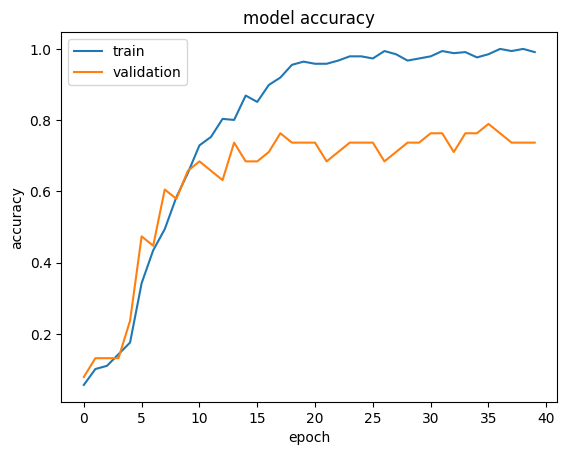

In [12]:
# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

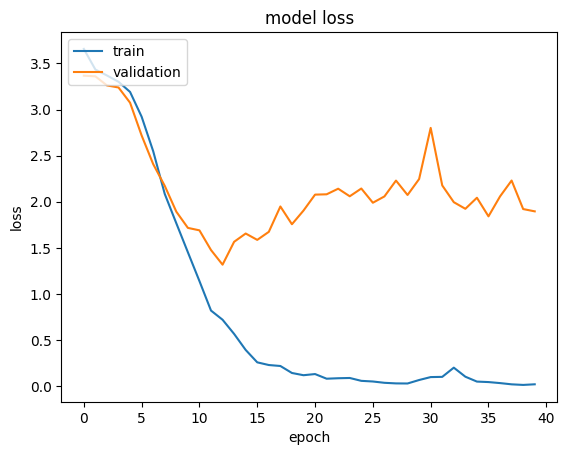

In [10]:
# more graphs
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# more graphs
plt.figure(3)
